# Defining a Lesion

Conducting a lesion analysis in ConWhAt is extremely simple. All that is needed is a binary  `.nii` format lesion mask, with ones indicating lesioned tissue, and zeros elsewhere. 


>(Note: we terms like 'lesion' and 'damage' throughout most of this documentation, as that is the most natural primary context for ConWhAt analyses. Remember however that all we are doing at the end of the day is doing a set of look-up operations between a list of standard space coordinates on the one hand (as defined by non-zero values in a `.nii` image), and the spatial locations of each 'connectome edge' -  i.e. each entry in our anatomical connectivity matrix. One can envisave many alternative interpretations/applications of this procedure; for example to map the connectivity effects of magnetic field or current distributions from nonivasive brain stimulation). Still, for concreteness and simplicity, we stick with 'lesion', 'damage', etc. for the most part. )


A common way to obtain a lesion map is to from a patient's T1-weighted MR image. Although this can be done manually, it is strongly recommended to use an automated lesion segmentation tools, followed by manual editing. 

An alternative way is simply to define a lesion location using standard space coordinates, and build a 'lesion' mask *de-novo*. This is what we do in the following example. On the next page we do a ConWhAt connectome-based decomposition analysis on this 'synthetic' lesion mask.

---

In [18]:
# ConWhAt stuff
from conwhat import VolConnAtlas,StreamConnAtlas,VolTractAtlas,StreamTractAtlas
from conwhat.viz.volume import plot_vol_and_rois_nilearn

# Neuroimaging stuff
import nibabel as nib
from nilearn.plotting import plot_roi
from nipy.labs.spatial_models.mroi import subdomain_from_balls
from nipy.labs.spatial_models.discrete_domain import grid_domain_from_image

# Viz stuff
%matplotlib inline
from matplotlib import pyplot as plt

# Generic stuff
import numpy as np

Define some variables

In [25]:
# Locate the standard space template image
fsl_dir = '/global/software/fsl/5.0.10'
t1_mni_file = fsl_dir + '/data/standard/MNI152_T1_1mm_brain.nii.gz'
t1_mni_img = nib.load(t1_mni_file)

# This is the output we will save to file and use in the next example
lesion_file = 'synthetic_lesion_20mm_sphere_-46_-60_6.nii.gz'

Define the 'synthetic lesion' location and size using standard (MNI) space coordinates

In [19]:
com = [-46,-60,6] # com = centre of mass
rad = 20             # radius

Create the ROI

In [20]:
domain = grid_domain_from_image(t1_mni_img)
lesion_img = subdomain_from_balls(domain,np.array([com]), np.array([rad])).to_image()

Plot on brain slices

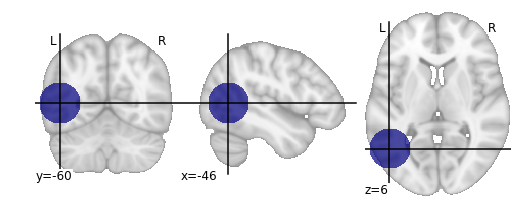

In [28]:
plot_roi(lesion_img,bg_img=t1_mni_img,black_bg=False);

Save to file

In [29]:
lesion_img.to_filename(lesion_file)

...now we move on to doing a lesion analysis with this file. 